In [1]:
import cv2

In [2]:
def size(img):
    new_width = 500  # 새 너비
    new_height = 600  # 새 높이
    resized_image = cv2.resize(img, (new_width, new_height)) #창 크기 조정
    return resized_image

1.이미지를 창을 열어서 표시

In [3]:
img_ori = cv2.imread(r"line.png")

if img_ori is None:
    print("Error: Image not found or unable to load.")
else:
    cv2.imshow("image", size(img_ori))
    cv2.waitKey(0)
    cv2.destroyAllWindows()



* cv2.imread(이미지 주소)         
                    이미지 읽기

* cv2.imshow("창 이름", 이미지 주소)                  
                이미지 표시
* cv2.waitKey(대기 시간)            
                   0 : 무한 대기
* cv2.destroyAllWindows()            
                  모든 OpenCV 창을 닫기

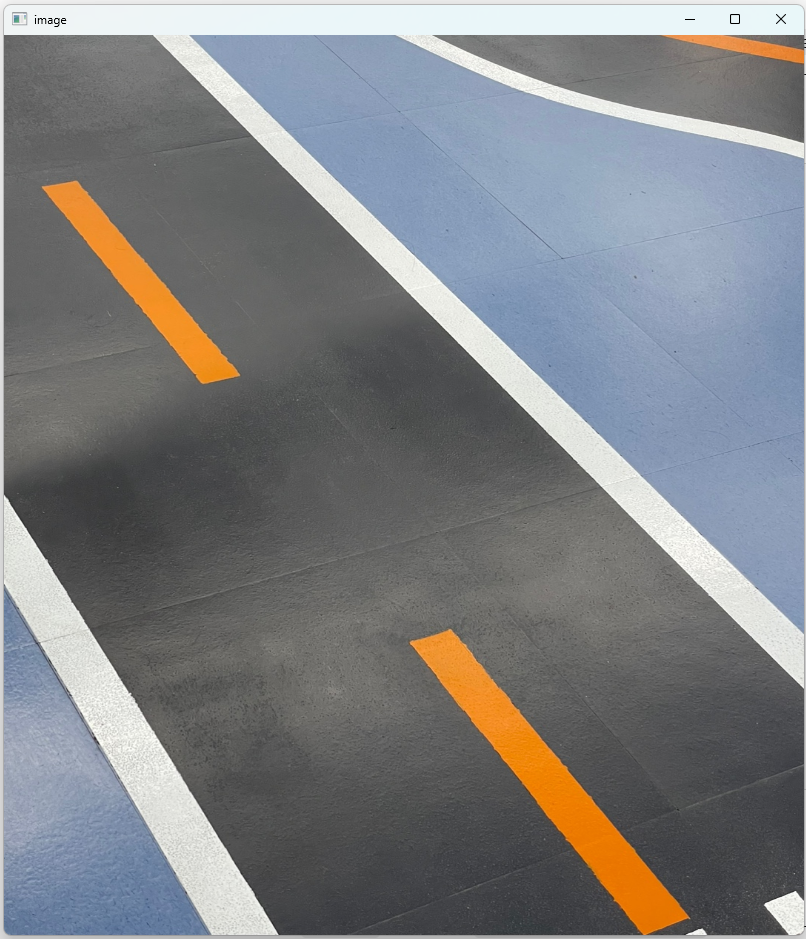

2. 이미지 색을 변환(흑백)

In [4]:
gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)
cv2.imshow("image", size(gray))
cv2.waitKey(0)
cv2.destroyAllWindows()



* cv2.cvtColor(이미지 주소, cv2.COLOR_BGR2GRAY)


![alt text][def]

[def]: image.png

3. 블러링

In [5]:
blurred = cv2.GaussianBlur(gray, (9, 9), 0)
cv2.imshow("image", size(blurred))
cv2.waitKey(0)
cv2.destroyAllWindows()

* cv2.GaussianBlur(gray, (커널 크기),   sigmaX)

  커널 크기:            
      가우시안 필터가 적용되는 영역을 정의    
      이 크기 내에서 가우시안 분포를 적용하여 주변 픽셀과의 평균을 계산   
      커널 크기가 클수록 더 많은 주변 픽셀이 평균화에 포함되어, 결과적으로 더 부드러운 이미지가 생성된다
      
  sigmaX :         
      이 값이 크면 블러 효과가 강해지고, 작으면 블러 효과가 약해진다 (0을 지정하면 OpenCV가 자동으로 표준 편차를 계산)
  


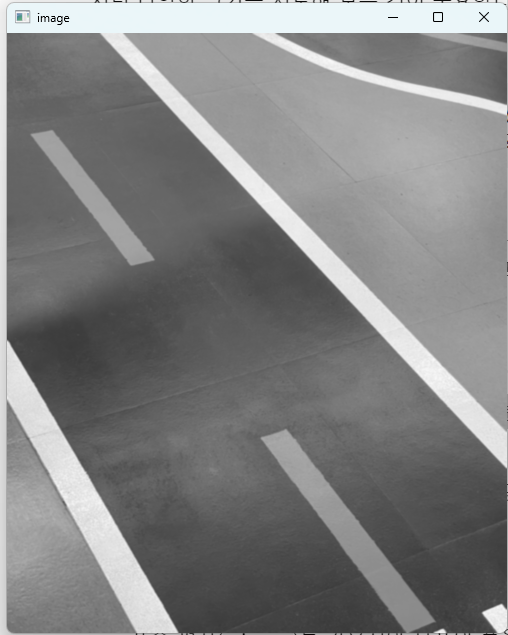

4. 엣지 검출

In [6]:
edges = cv2.Canny(blurred, 30, 150)
cv2.imshow("image", size(edges))
cv2.waitKey(0)
cv2.destroyAllWindows()

- **cv2.Canny( 이미지주소, 하한 임계값, 상한 임계값 )**    
        하한 임계값 : 50에서 100 사이     
        상한 임계값 : 150에서 300 사이   
         
- 일반적인 설정:        
        - Lower Threshold: 100        
        - Upper Threshold: 200          
- 노이즈가 많은 이미지:      
        - Lower Threshold: 50    
        - Upper Threshold: 150   
- 고대비 이미지:     
        - Lower Threshold: 150     
        - Upper Threshold: 250
     
블러링 없음

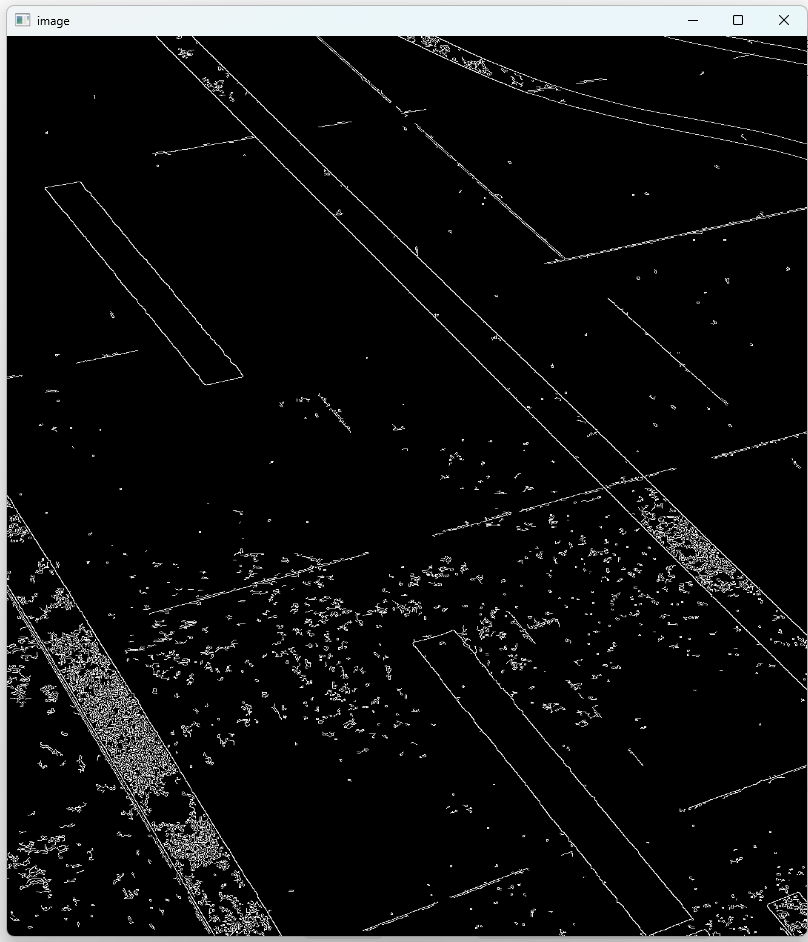

블러링 있음

커널 크기(3, 3)

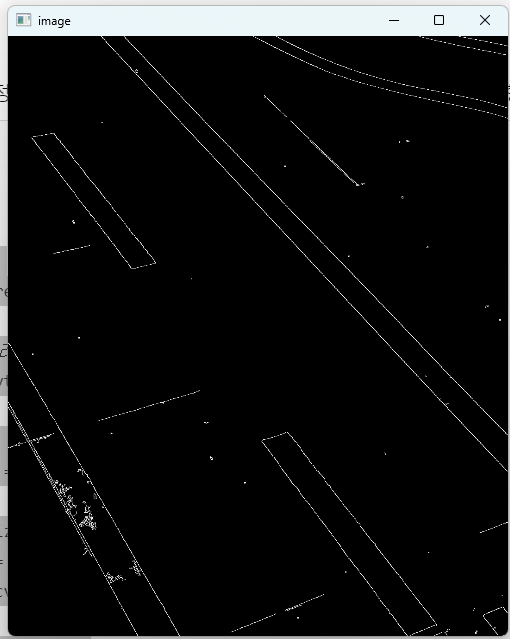

커널 크기(5, 5)

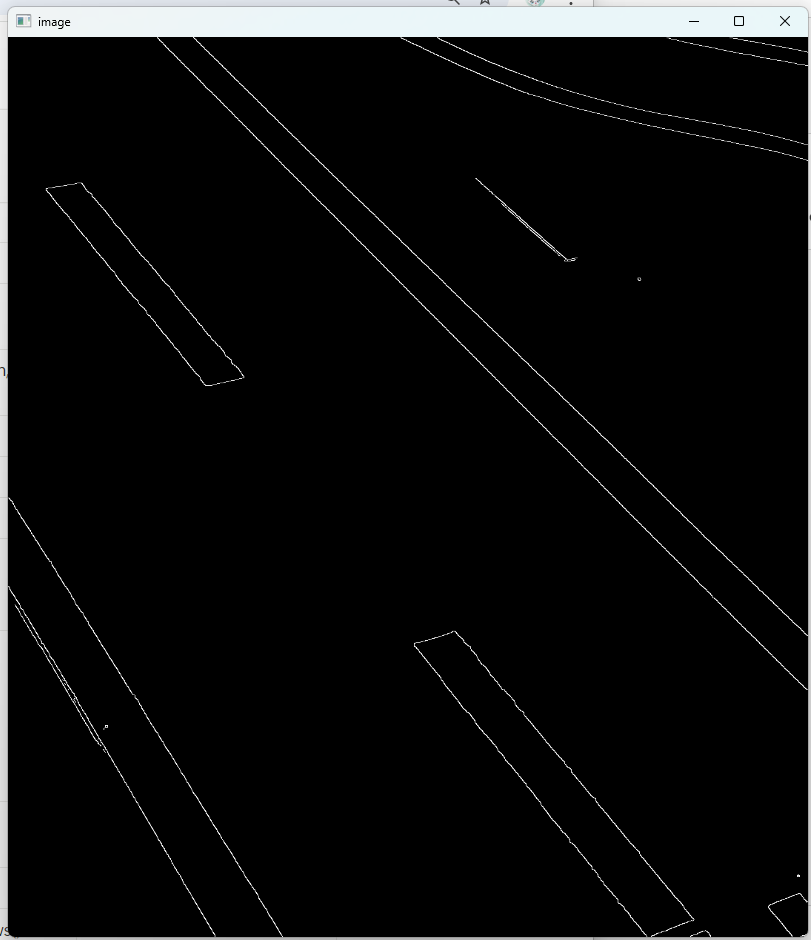

커널 크기(9, 9)

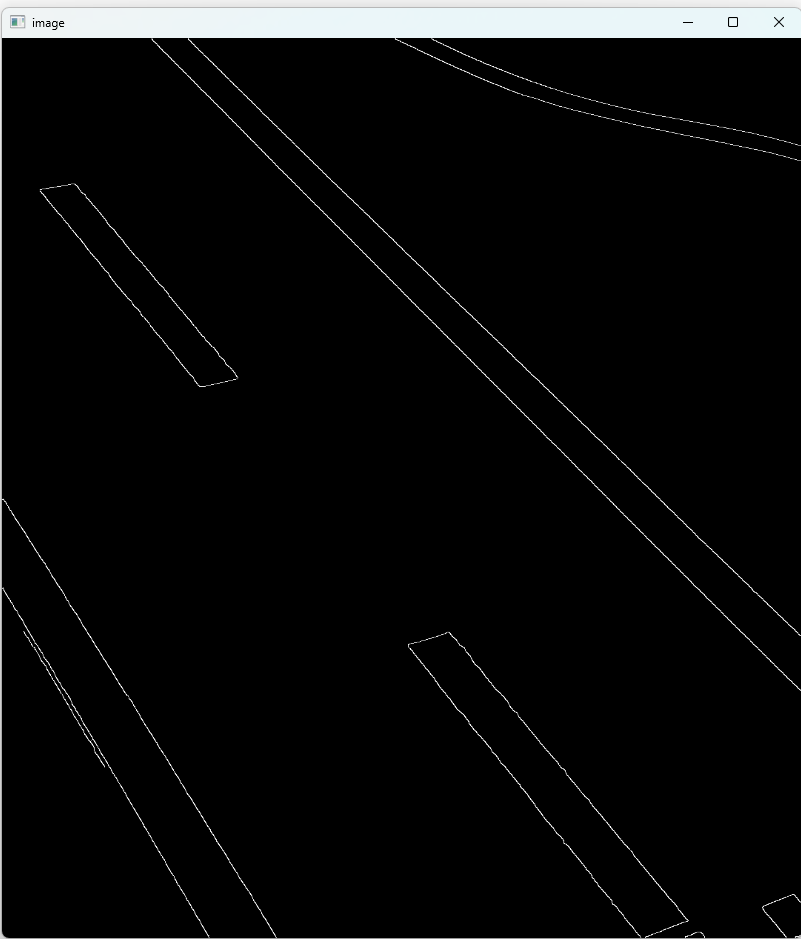

5. 각도 조절


In [7]:
import numpy as np

lines = cv2.HoughLinesP(edges, 1, (180 / np.pi), threshold=50, minLineLength=100, maxLineGap=10)

angles = []
# 직선의 각도를 계산하고 그리기
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        
        # 직선의 기울기와 각도 계산
        angle = np.arctan2(y2 - y1, x2 - x1) * (180 / np.pi)  # 라디안을 도 단위로 변환
        
        # 직선을 이미지에 그리기
        cv2.line(edges, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # 각도 출력
        print(f"Line from ({x1}, {y1}) to ({x2}, {y2}) has angle: {angle:.2f} degrees")
        angles.append(angle)
        
# 평균 각도 계산
mean_angle = np.mean(angles)
print(f"Mean Angle: {mean_angle:.2f} degrees")

(h, w) = edges.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -mean_angle + 8, 1.0)

# 회전된 이미지 생성
rotated_image = cv2.warpAffine(img_ori, M, (w, h))


# 결과 이미지 표시
cv2.imshow("Detected Lines", size(img_ori))
cv2.imshow("Rotated Image", size(rotated_image))
cv2.waitKey(0)
cv2.destroyAllWindows()

Line from (3, 956) to (3, 543) has angle: -90.00 degrees
Line from (3, 469) to (3, 118) has angle: -90.00 degrees
Mean Angle: -90.00 degrees


* cv2.HoughLinesP  ( img_path, 1, np.pi / 180, threshold, minLineLength, maxLineGap )
    
    ***엣지 이미지에서 직선을 검출***
    - 1: 거리 해상도(픽셀 단위).
    - np.pi(π) / 180 : 각도 해상도(라디안 단위).
    - threshold :  "직선"이라고 하기 위해 필요한 최소 투표 수. (50에서 100 사이)
    - minLineLength : 직선의 최소 길이. ( 도로 선을 검출하는 경우 100 픽셀 이상)
    - maxLineGap : 직선의 연속성을 유지하기 위해 허용되는 최대 간격 ( 5에서 20 픽셀 사이)
* x1, y1, x2, y2 = line[0]
    - (x1, y1) : 직선의 시작점
    - (x2, y2) : 직선의 끝점
    - line[0] : 몇 번째 직선
* np.arctan2()  
     
    ***주어진 두 점의 y좌표 차이와 x좌표 차이를 기반으로 각도를 계산***         
              (주어진 두 값 y좌표와 x좌표에 대한 아크탄젠트(역탄젠트)를 계산하여 해당 점의 각도를 라디안 단위로 반환)

    * x > 0, y > 0 : 1사분면 (0에서 90도 사이)
    * x < 0, y > 0 : 2사분면 (90에서 180도 사이)
    * x < 0, y < 0 : 3사분면 (180에서 270도 사이)
    * x > 0, y < 0: 4사분면 (270에서 360도 사이)
    
    
    Degrees(도) = Radians × (180 / π )
    - angle = np.arctan2(y2 - y1, x2 - x1) * (180 / np.pi(π))

* 라인 그리기     
    - cv2.line(edges, (x1, y1), (x2, y2), (0, 255, 0), 2)        
    - cv2.line(edges, (직선의 시작점), (직선의 끝점), (선의 색깔), 선 두께)

* np.mean()    
    - 평균을 계산
    - np.median() :  중앙값

* (h, w) = edges.shape[:2]      
    - edges 이미지의 높이(h)와 너비(w)를 가져오기
    - center = (w // 2, h // 2)  : 이미지의 중심 좌표

* cv2.getRotationMatrix2D()    
    **회전 변환 행렬을 생성**
    - cv2.getRotationMatrix2D(center, -mean_angle, 1.0)     
        cv2.getRotationMatrix2D( 회전의 중심점,  회전할 각도,  스케일(1.0 -> 크기를 변경하지 않음) )

*  cv2.warpAffine()         
    **주어진 변환 행렬을 사용하여 이미지를 변환**
    - 회전 변환을 적용하여 새로 이미지를 생성
    - cv2.warpAffine(회전하는 이미지주소,  회전각도,  (출력 이미지의 크기))

    
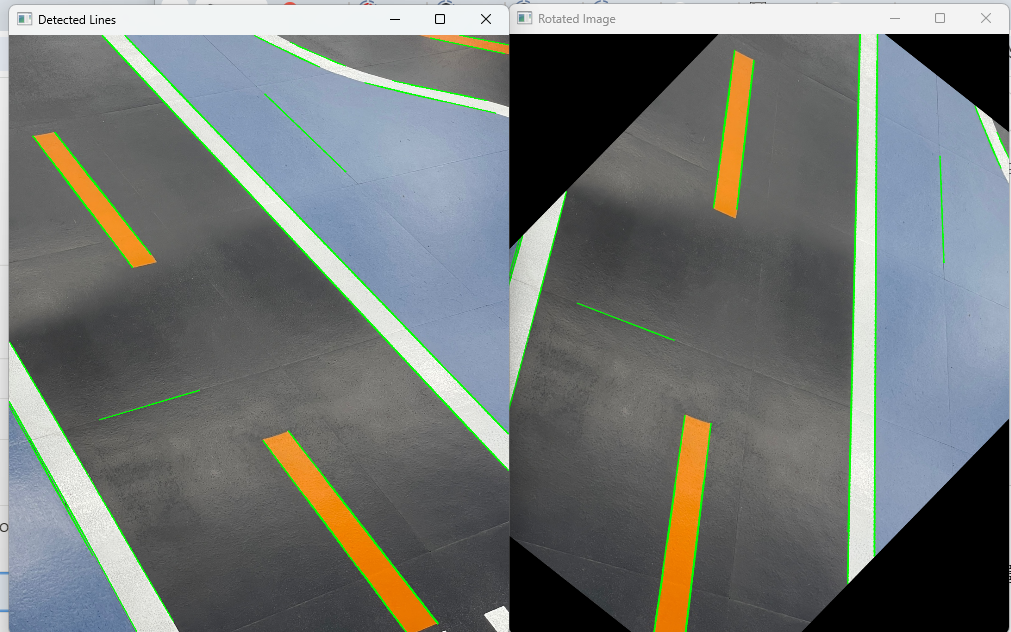

사진에 따라 안될 수도 있으므로 수정이 필요함